## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [326]:
dataset = pd.read_csv("./datasets/titanic.csv")

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
dataset.shape

(891, 12)

In [328]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [329]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [330]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



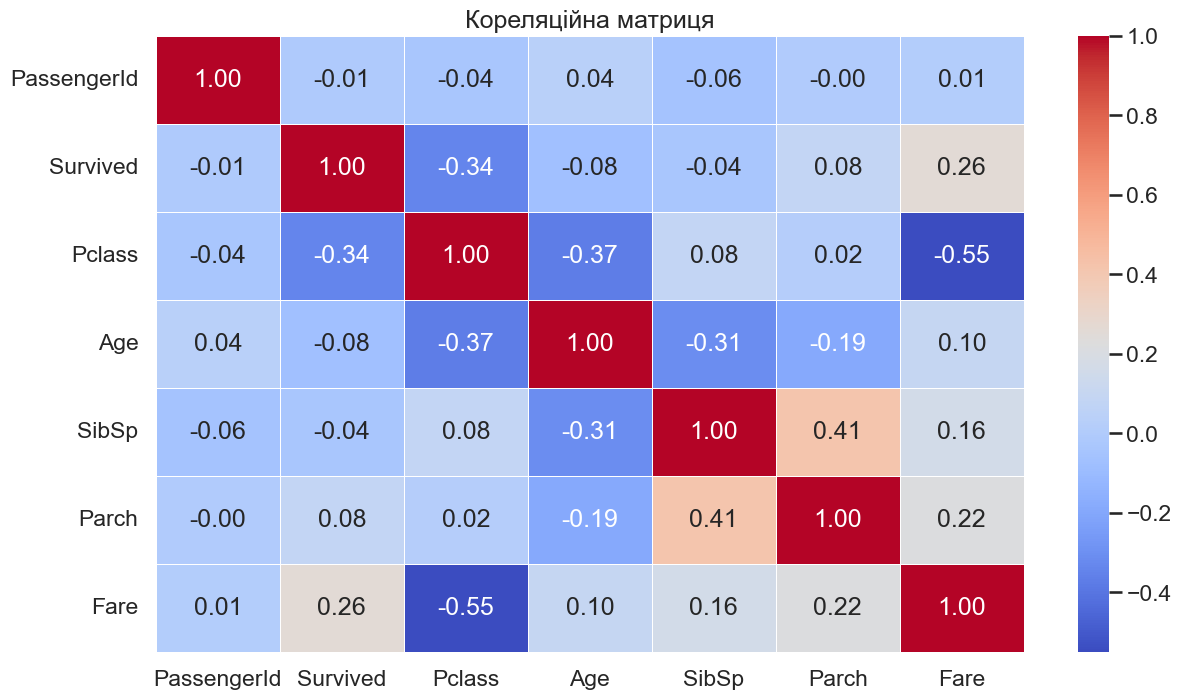

In [331]:
numeric_dataset = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataset.corr(method='pearson')

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()


Ваші висновки:

#todo

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [332]:
def fill_missing_data(dataset, column, group_cols):
    dataset = dataset.copy()  
    dataset[column] = dataset[column].fillna(dataset.groupby(group_cols)[column].transform("median"))
    return dataset

df_filled = fill_missing_data(dataset, "Age", ["Pclass", "Sex"])

print(df_filled.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





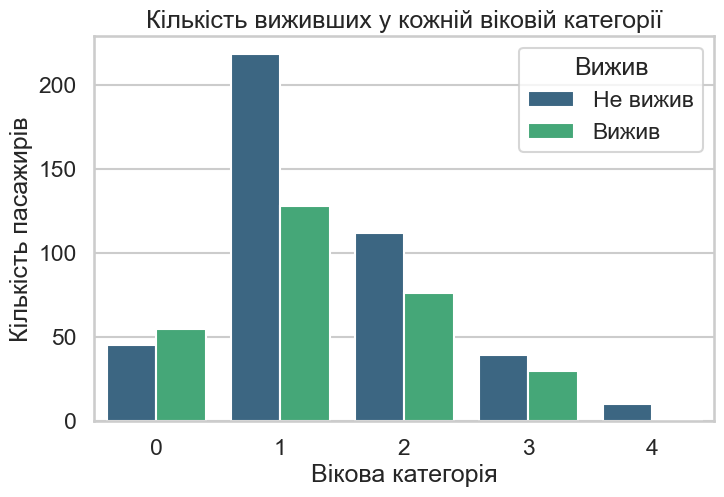

In [333]:
bins = [0, 16, 32, 48, 64, 80]
labels = [0, 1, 2, 3, 4]
dataset["Age_bin"] = pd.cut(dataset["Age"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.countplot(x="Age_bin", hue="Survived", data=dataset, palette="viridis")

plt.xlabel("Вікова категорія")
plt.ylabel("Кількість пасажирів")
plt.title("Кількість виживших у кожній віковій категорії")
plt.legend(title="Вижив", labels=["Не вижив", "Вижив"])

plt.show()


Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [334]:
dataset["Fare_category"] = pd.qcut(dataset["Fare"], q=4, labels=[1, 2, 3, 4])

fare_survival_table = pd.crosstab(dataset["Fare_category"], dataset["Survived"], margins=True)


fare_survival_table["Survival Rate (%)"] = fare_survival_table[1] / fare_survival_table["All"] * 100
fare_survival_table = fare_survival_table.drop('All')

fare_survival_table

Survived,0,1,All,Survival Rate (%)
Fare_category,,,,
1,179,44,223,19.730942
2,156,68,224,30.357143
3,121,101,222,45.495495
4,93,129,222,58.108108


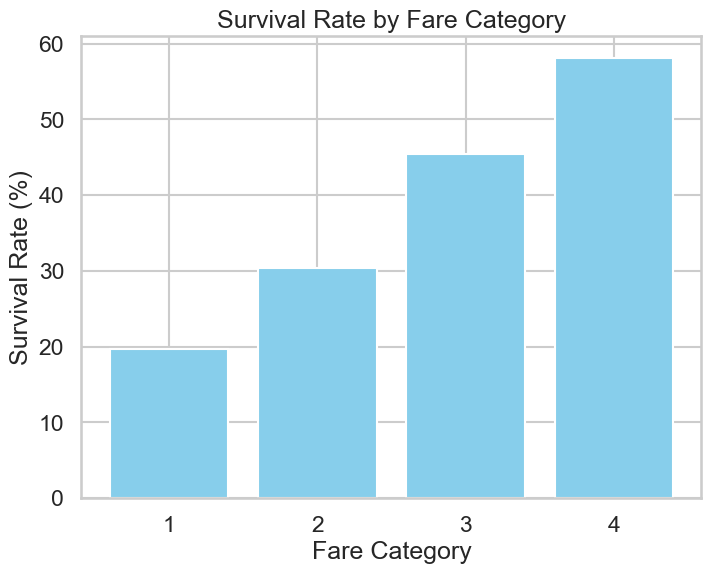

In [335]:
plt.figure(figsize=(8, 6))
plt.bar(fare_survival_table.index.astype(int), fare_survival_table["Survival Rate (%)"], color='skyblue')

plt.xlabel('Fare Category')
plt.xticks(range(1, 5)) 
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Fare Category')

plt.show()

Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

354
537


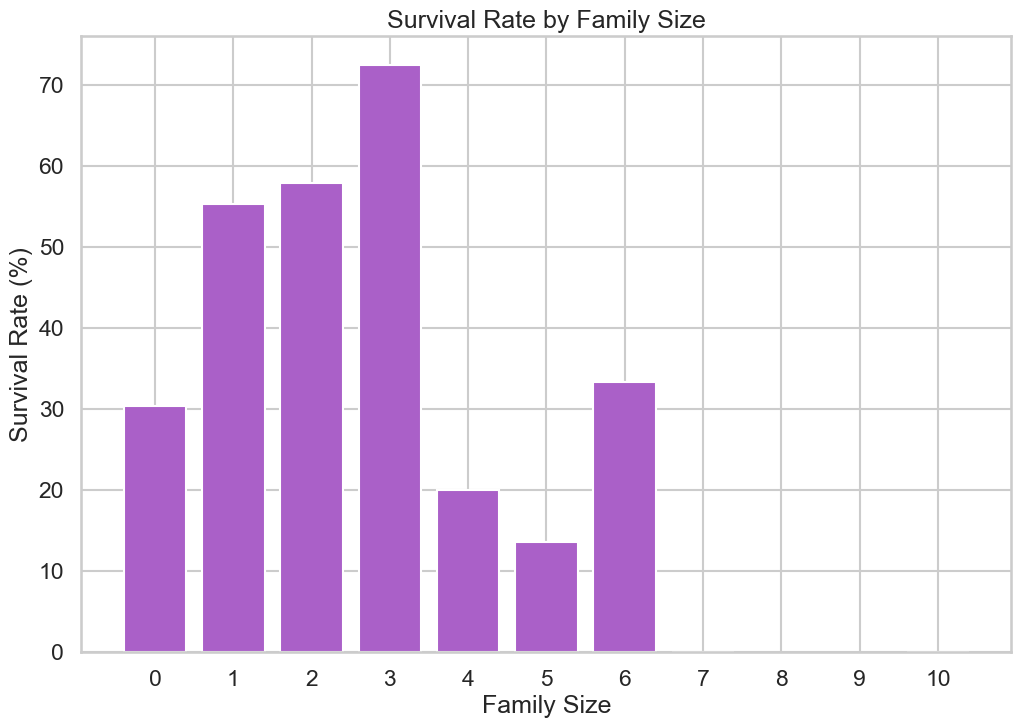

In [336]:
dataset["Family_size"] = dataset["Parch"] + dataset["SibSp"]
dataset["Alone"] = (dataset["Family_size"] == 0).astype(int)

family_survival = dataset.groupby("Family_size")["Survived"].mean() * 100

plt.figure(figsize=(12, 8))
plt.bar(family_survival.index, family_survival, color="#AA60C8")

plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Family Size")
plt.xticks(range(0, int(dataset["Family_size"].max() + 1)))

plt.show()

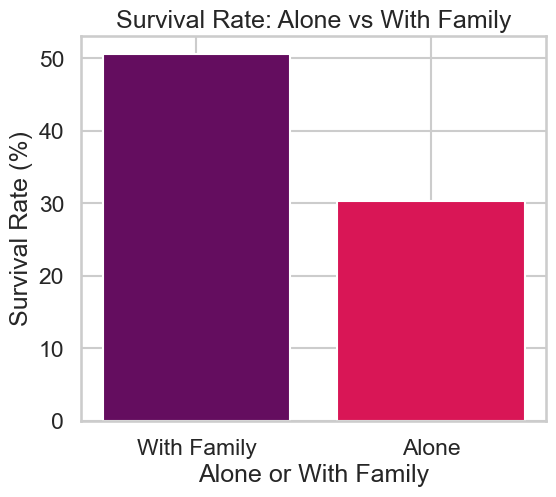

In [337]:
alone_survival = dataset.groupby("Alone")["Survived"].mean() * 100

plt.figure(figsize=(6, 5))
plt.bar(["With Family", "Alone"], alone_survival, color=['#640D5F', '#D91656'])

plt.xlabel("Alone or With Family")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate: Alone vs With Family")

plt.show()

Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [338]:
columns_to_drop = [col for col in dataset.columns if dataset[col].isnull().mean() > 0.20]
print(columns_to_drop)

dataset = dataset.drop(columns=columns_to_drop).drop(columns=["SibSp", "Parch"])
print(dataset.columns)

['Cabin']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Age_bin', 'Fare_category', 'Family_size', 'Alone'],
      dtype='object')


Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [339]:
def extract_title(name):
    """
    Finds and returns a title (Miss., Mrs., or Mr.) from a full name.

    Parameters:
        name (str): A full name that may contain a title.

    Returns:
        str or None: The extracted title if found, otherwise None.
    """
    if "Miss." in name:
        return "Miss."
    elif "Mrs." in name:
        return "Mrs."
    elif "Mr." in name:
        return "Mr."
    
    return None

In [340]:
dataset['Title'] = dataset["Name"].map(extract_title)

In [341]:
dataset["Sex"] = dataset["Sex"].astype("category").cat.codes
dataset["Embarked"] = dataset["Embarked"].astype("category").cat.codes
dataset["Title"] = dataset["Title"].astype("category").cat.codes

In [342]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    int8    
 5   Age            714 non-null    float64 
 6   Ticket         891 non-null    object  
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    int8    
 9   Age_bin        714 non-null    category
 10  Fare_category  891 non-null    category
 11  Family_size    891 non-null    int64   
 12  Alone          891 non-null    int64   
 13  Title          891 non-null    int8    
dtypes: category(2), float64(2), int64(5), int8(3), object(2)
memory usage: 67.5+ KB


Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



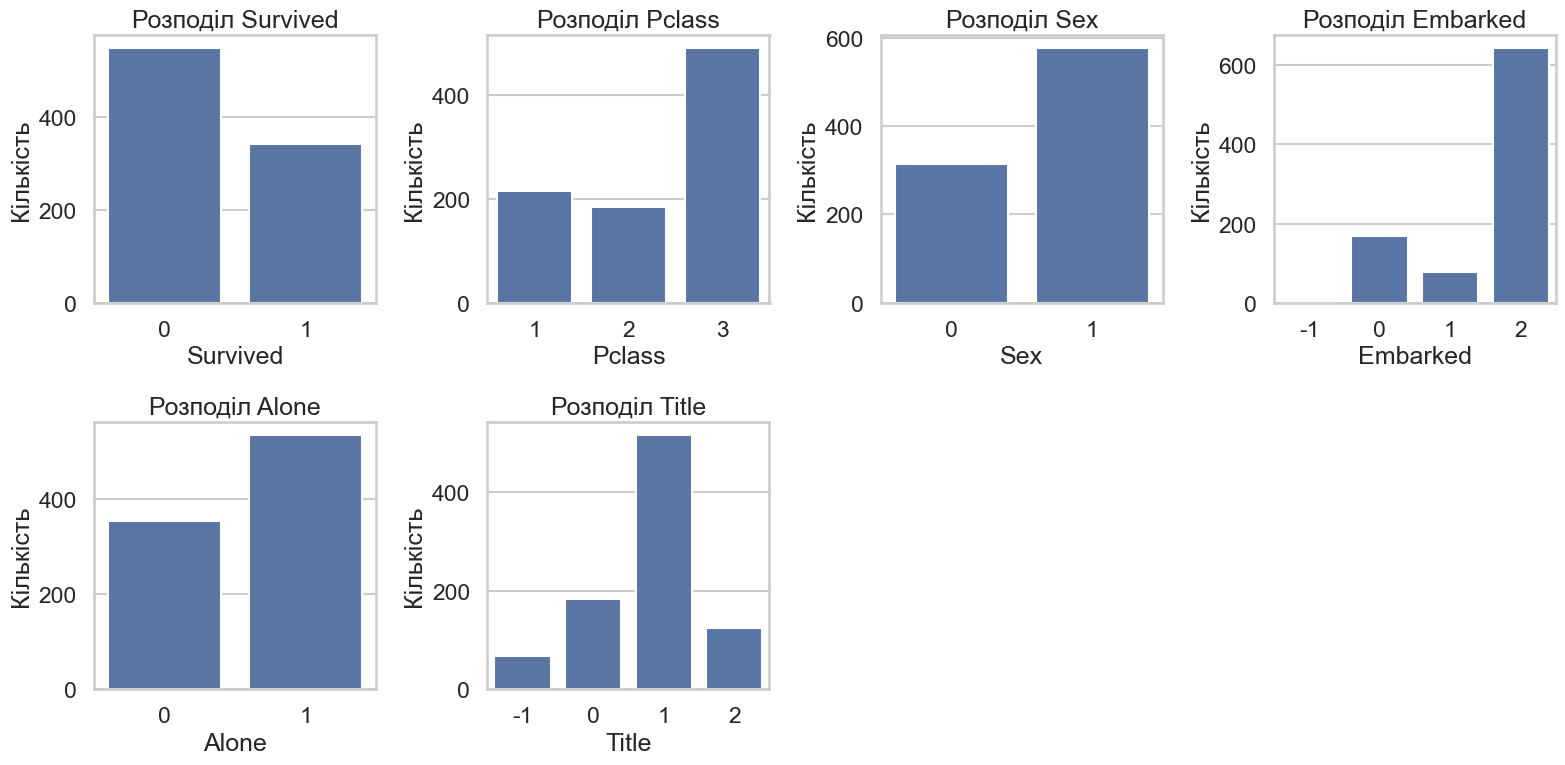

In [343]:
categorical_columns = ["Survived", "Pclass", "Sex", "Embarked", "Alone", "Title"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=dataset[column], ax=axes[i])
    axes[i].set_title(f'Розподіл {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Кількість")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [344]:
dataset["Age"] = dataset["Age"].dropna().astype(int)

numerical_columns = ["Age", "Fare", "Family_size"]

(np.float64(0.0), np.float64(80.0))

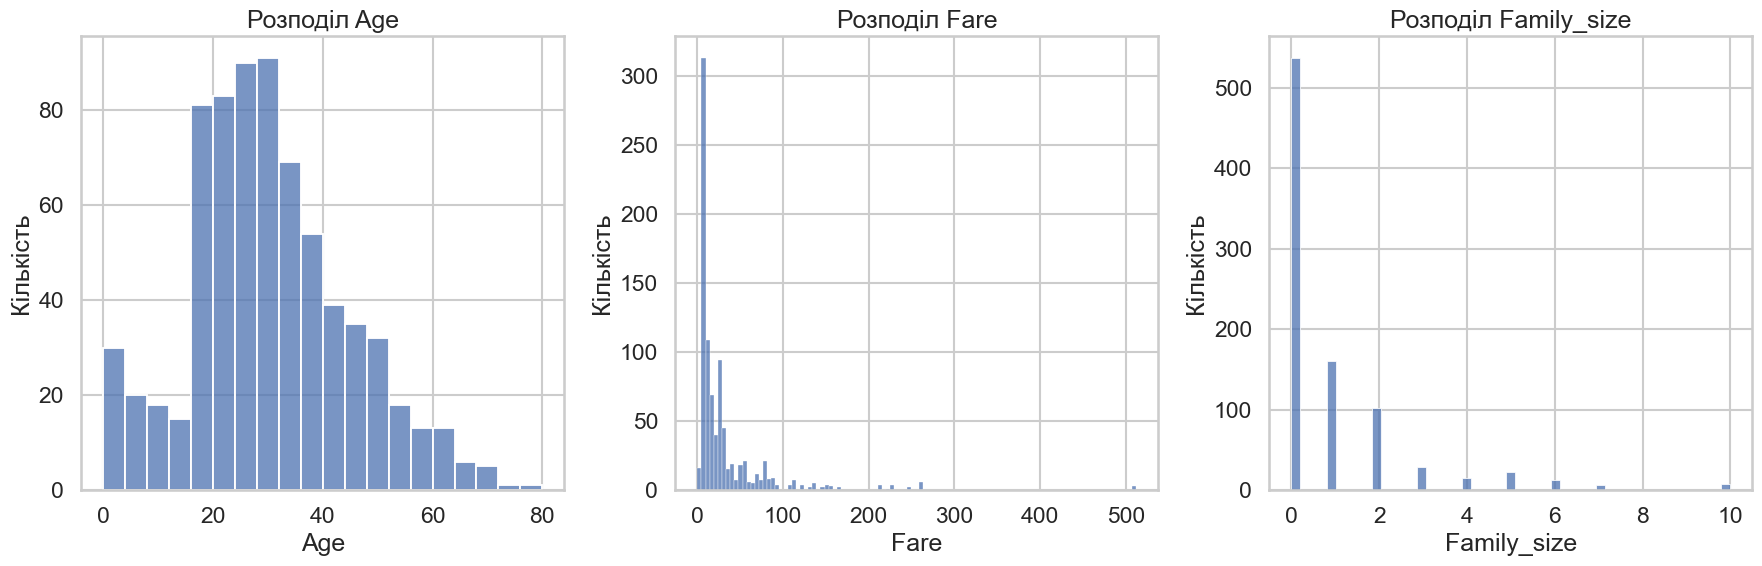

In [353]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, column in enumerate(numerical_columns):
    sns.histplot(dataset[column], ax=axes[i])
    axes[i].set_title(f'Розподіл {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Кількість")


plt.tight_layout()
plt.show()

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

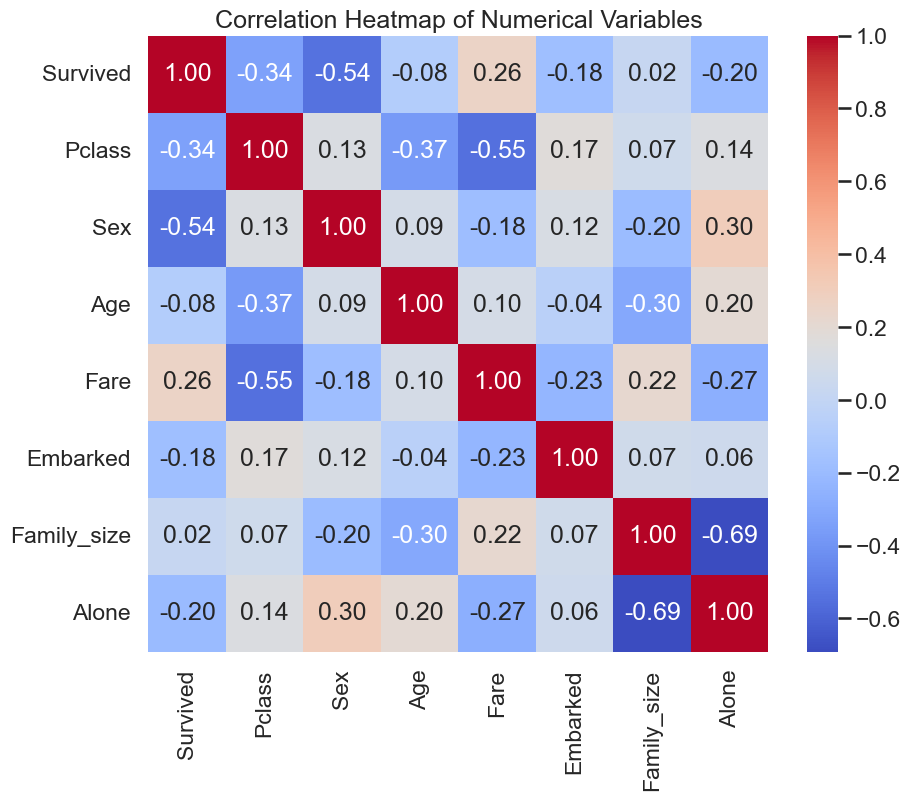

In [367]:
numerical_cols = ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "Family_size", "Alone"]
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [365]:
alone_counts = dataset.groupby("Sex")["Alone"].sum()
alone_counts

Sex
0    126
1    411
Name: Alone, dtype: int64

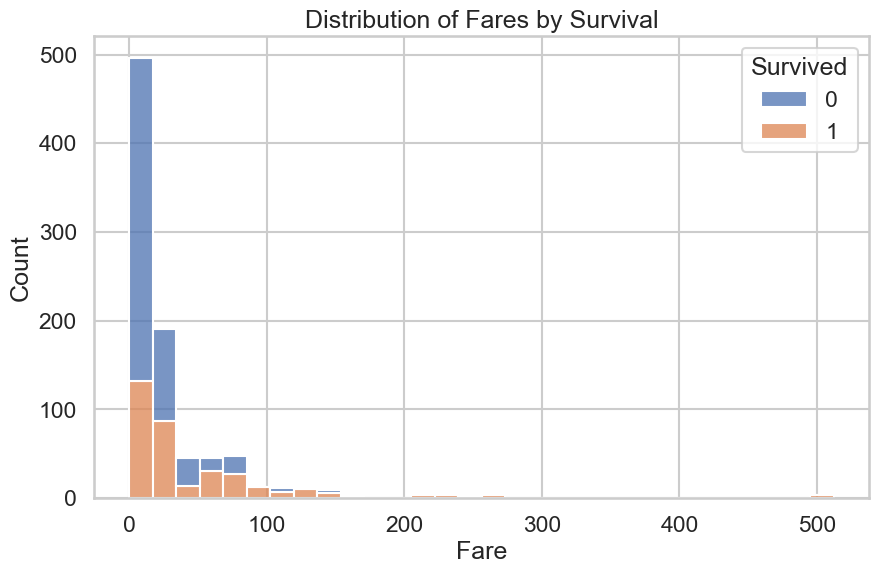

In [386]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x="Fare", hue="Survived", bins=30, multiple="stack", kde=False)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Fares by Survival")

plt.show()



Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.